In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np


In [11]:
data = pd.read_csv('/Users/amaanqureshi/Desktop/TB2/mini project/user_large_with_dates.csv')

data['biz_interaction_count'] = data['user_biz_interaction'].apply(lambda x: len(eval(x)))

numerical_features = ['total_tx_count', 'net_tx_count', 'total_tx_sum_gbp', 'net_tx_sum_gbp', 'biz_interaction_count']  # Add more as needed
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [12]:

features = ['total_tx_count', 'net_tx_count', 'total_tx_sum_gbp', 'net_tx_sum_gbp',
            'sent_tx_count', 'received_tx_count']  

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

model.fit(scaled_features)

#(-1 for anomaly, 1 for normal)
anomalies = model.predict(scaled_features)

data['anomaly'] = anomalies


In [26]:
print(len(anomalies))

14236


In [14]:
anomaly_count = np.sum(anomalies == -1)
print(f"Number of anomalies detected: {anomaly_count}")

Number of anomalies detected: 2502


In [15]:
## Financial Health Analysis
data['sent_received_ratio'] = data['sent_tx_sum_gbp'] / data['received_tx_sum_gbp']
data['financial_health_indicator'] = 'Healthy'  #default healthy

healthy_threshold = 0.75  #more received 
concern_threshold = 1.25  #more sent 


data.loc[data['sent_received_ratio'] > concern_threshold, 'financial_health_indicator'] = 'Concern'
data.loc[data['sent_received_ratio'] < healthy_threshold, 'financial_health_indicator'] = 'Very Healthy'

financial_health_summary = data['financial_health_indicator'].value_counts()

print(financial_health_summary)

Concern         8045
Very Healthy    6171
Healthy           20
Name: financial_health_indicator, dtype: int64


In [18]:
##Kmeans Cluster

features = ['total_tx_count', 'net_tx_sum_gbp', 'sent_tx_count', 'received_tx_count', 'biz_interaction_count']  # Add or remove features based on your dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])


# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  #adjust n_clusters 
clusters = kmeans.fit_predict(scaled_features)


data['cluster'] = clusters


/Users/amaanqureshi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
clusters

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

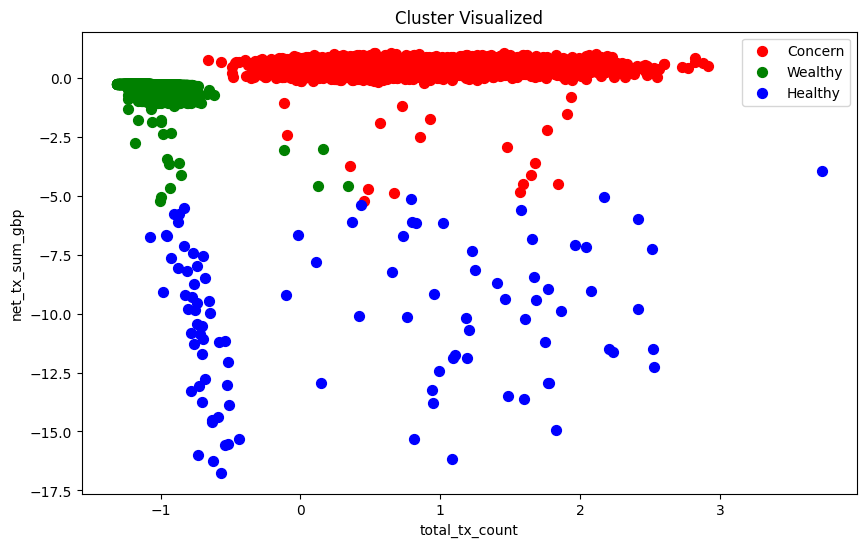

In [20]:

feature_x = 'total_tx_count' 
feature_y = 'net_tx_sum_gbp' 

plt.figure(figsize=(10, 6))  
colors = ['red', 'green', 'blue']
labels = ['Concern', 'Wealthy', 'Healthy']

for i, cluster in enumerate(np.unique(clusters)):
    plt.scatter(data.loc[clusters == cluster, feature_x], 
                data.loc[clusters == cluster, feature_y], 
                s=50, c=colors[i], label = labels[i])

plt.title('Cluster Visualized')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()
